In [161]:
from Fun_to_prepare_data import * 
from sklearn.model_selection import train_test_split
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import time
from tensorboard.plugins.hparams import api as hp

In [162]:
paths={1:"../imputs/oranges_dataset/oranges_pictures/",
      0:"../imputs/oranges_dataset/random_pictures/"}
images={}
for clas,path in paths.items():
    images[clas]=[]
    for im in listdir(path):
        if im.endswith("jpg") or im.endswith("png"):
            a=resize_image(path+im,(64,64))
            images[clas].append(np.asarray(a))
    images[clas]=np.array(images[clas])

In [163]:
X= np.concatenate(list(images.values()),axis=0)

In [164]:
y = np.concatenate([[k]* v.shape[0] for k,v in images.items()])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=42)



In [166]:
name = "Oranges_model_sigmoid_2-{}".format(int(time.time()))

In [167]:
Tensorboard =TensorBoard(log_dir="logs/{}".format(name)) 

In [168]:
img_width, img_height = 64, 64
img_rows, img_cols = 64, 64

# Prepare data to feed the NN
num_classes = 2

# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_width, img_height)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_width, img_height, 3)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
#X_train = tf.keras.utils.normalize(X_train,axis=3)
#X_test = tf.keras.utils.normalize(X_test,axis=3)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (1447, 64, 64, 3)
1447 train samples
1 test samples


In [169]:
img_width, img_height = 64, 64

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Flatten())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dropout(0.9))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.add(Dense(2))
#model.add(Activation('relu'))




model.compile(loss='binary_crossentropy',
              #optimizer='rmsprop',
              optimizer='adam',
              metrics=['accuracy'])
batch_size = 20
epochs = 25

In [170]:
predictions = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1 ,
          validation_data=(X_test, y_test),
          callbacks=[Tensorboard])

Epoch 1/25
73/73 [==============================] - 8s 105ms/step - loss: 0.3197 - accuracy: 0.8763 - val_loss: 0.6275 - val_accuracy: 1.0000
Epoch 2/25
73/73 [==============================] - 7s 94ms/step - loss: 0.2428 - accuracy: 0.9102 - val_loss: 0.4404 - val_accuracy: 1.0000
Epoch 3/25
73/73 [==============================] - 7s 93ms/step - loss: 0.2349 - accuracy: 0.9178 - val_loss: 0.0944 - val_accuracy: 1.0000
Epoch 4/25
73/73 [==============================] - 7s 93ms/step - loss: 0.2092 - accuracy: 0.9240 - val_loss: 0.1711 - val_accuracy: 1.0000
Epoch 5/25
73/73 [==============================] - 7s 93ms/step - loss: 0.1969 - accuracy: 0.9295 - val_loss: 0.1145 - val_accuracy: 1.0000
Epoch 6/25
73/73 [==============================] - 7s 95ms/step - loss: 0.1884 - accuracy: 0.9357 - val_loss: 0.2784 - val_accuracy: 1.0000
Epoch 7/25
73/73 [==============================] - 7s 93ms/step - loss: 0.1833 - accuracy: 0.9357 - val_loss: 0.1376 - val_accuracy: 1.0000
Epoch 8/25
7

In [171]:
# Evaluate the model with test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05705799162387848
Test accuracy: 1.0


predictions = model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1 ,
          validation_data=(X_test, y_test),
          callbacks=[Tensorboard])

In [172]:
model.save_weights('../weights/model_weights_more_troncos')

In [173]:
model.save('../weights/model_full_more_troncos')

INFO:tensorflow:Assets written to: ../weights/model_full_more_troncos/assets


La probabilidad de que sea una naranja es de 0.9969189167022705


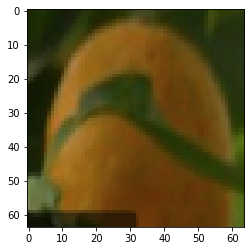

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[13]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(f"La probabilidad de que sea una naranja es de {pred[0]}")
#print("Probs -> Cat:{0:.5f} Dog:{1:.5f}".format(pred[0],pred[1]))
plt.imshow(X_test[13])

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

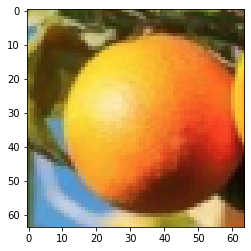

In [16]:
plt.imshow(X_test[4])

# tensorboard --logdir logs/


In [17]:
def inputs(imagen):
    a=resize_image(imagen,(64,64))
    a=np.asarray(a)
    a= a.astype('float32') / 255
    return a

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = a
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(f"La probabilidad de que sea una naranja es de {pred[0]}")
plt.imshow(a)

In [ ]:
def sliding_window(image,w_shape,stepSize):
    w_width, w_height = w_shape # window size
    for x in range(0, image.shape[1] - w_width , stepSize):
        for y in range(0, image.shape[0] - w_height, stepSize):
            window = image[x:x + w_width, y:y + w_height, :]
            yield window

In [ ]:
sliding_window(img,(40,40),20)